In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Packages Required for Analysis

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
##
import random
from pathlib import Path
import collections
##
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib as mpl
from scipy.stats import norm
from scipy.stats import ttest_ind
import statistics
from IPython.display import Image
%matplotlib inline     
sns.set(color_codes=True)

### Upload the csv file into your google drive and give file location to run the code

In [ ]:
DATA_DIR = Path("/content/drive/My Drive/local_colab") # Hima

### breed1.csv file is the combination of 'Breed_traits.csv' and 'Breed_rank dataset' files


1.    Merged the dataset on cardinality 1 to 1 in Gsheets using Index Matching formuala. This is possible as there is a matching variable 'Breed' in both the datasets.
2.  Other ways of doing this merge is using Pandas library in Python.
3. If its SQL setup, Joins are the perfect options to merge dataset.

In [ ]:
# import sample dataset
filename = DATA_DIR / "breed1.csv"
dogs = pd.read_csv(filename, sep=",",dtype = str)


## Exploratory Data Analysis _ Data Understanding

#### Overview of the dataset features after merging two files.

In [ ]:
dogs.head()

,Breed,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,Drooling Level,Coat Type,Coat Length,Openness To Strangers,...,Barking Level,Mental Stimulation Needs,2013 Rank,2014 Rank,2015 Rank,2016 Rank,2017 Rank,2018 Rank,2019 Rank,2020 Rank
0,Retrievers (Labrador),5,5,5,4,2,2,Double,Short,5,...,3,4,1,1,1,1,1,1,1,1
1,French Bulldogs,5,5,4,3,1,3,Smooth,Short,5,...,1,3,11,9,6,6,4,4,4,2
2,German Shepherd Dogs,5,5,3,4,2,2,Double,Medium,3,...,3,5,2,2,2,2,2,2,2,3
3,Retrievers (Golden),5,5,5,4,2,2,Double,Medium,5,...,1,4,3,3,3,3,3,3,3,4
4,Bulldogs,4,3,3,3,3,3,Smooth,Short,4,...,2,3,5,4,4,4,5,5,5,5


#### Descriptive Statistics of the dataset.


*   There are total 195 rows in moast of the features. However, in fields like 2013 Rank, 2014 Rank,2015 Rank,2016 Rank,2017 Rank,2018 Rank,2019 Rank - It can be seen only 175 rows are filled with values.
*   Unique values and Frequency measures give a breif about the dataset stats.



In [ ]:
dogs.describe()

,Breed,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,Drooling Level,Coat Type,Coat Length,Openness To Strangers,...,Barking Level,Mental Stimulation Needs,2013 Rank,2014 Rank,2015 Rank,2016 Rank,2017 Rank,2018 Rank,2019 Rank,2020 Rank
count,195,195,195,195,195,195,195,195,195,195,...,195,195,176,176,176,176,176,176,175,194
unique,195,5,5,6,6,6,6,10,4,6,...,6,4,176,176,176,176,176,176,175,194
top,Retrievers (Labrador),5,3,3,3,2,1,Double,Short,3,...,3,3,1,1,1,1,1,1,1,1
freq,1,132,102,118,109,87,92,66,86,107,...,99,87,1,1,1,1,1,1,1,1


#### Preview of the null values in the dataset.


*   Now it can be seen below the data that is missing in the count from above table is due to na/missing values.
*   Interestingly 2019 Rank field has 20 null values while other Rank fields have 19 null values synchronously. 



In [ ]:
dogs.isna().sum()

Breed                          0
Affectionate With Family       0
Good With Young Children       0
Good With Other Dogs           0
Shedding Level                 0
Coat Grooming Frequency        0
Drooling Level                 0
Coat Type                      0
Coat Length                    0
Openness To Strangers          0
Playfulness Level              0
Watchdog/Protective Nature     0
Adaptability Level             0
Trainability Level             0
Energy Level                   0
Barking Level                  0
Mental Stimulation Needs       0
2013 Rank                     19
2014 Rank                     19
2015 Rank                     19
2016 Rank                     19
2017 Rank                     19
2018 Rank                     19
2019 Rank                     20
2020 Rank                      1
dtype: int64

In [ ]:
dogs.dropna(thresh=3, axis=0)

,Breed,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,Drooling Level,Coat Type,Coat Length,Openness To Strangers,...,Barking Level,Mental Stimulation Needs,2013 Rank,2014 Rank,2015 Rank,2016 Rank,2017 Rank,2018 Rank,2019 Rank,2020 Rank
0,Retrievers (Labrador),5,5,5,4,2,2,Double,Short,5,...,3,4,1,1,1,1,1,1,1,1
1,French Bulldogs,5,5,4,3,1,3,Smooth,Short,5,...,1,3,11,9,6,6,4,4,4,2
2,German Shepherd Dogs,5,5,3,4,2,2,Double,Medium,3,...,3,5,2,2,2,2,2,2,2,3
3,Retrievers (Golden),5,5,5,4,2,2,Double,Medium,5,...,1,4,3,3,3,3,3,3,3,4
4,Bulldogs,4,3,3,3,3,3,Smooth,Short,4,...,2,3,5,4,4,4,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Cesky Terriers,4,5,3,2,2,1,Wavy,Medium,4,...,3,3,174,182,179,182,185,185,190,191
191,American Foxhounds,3,5,5,3,1,1,Smooth,Short,3,...,5,3,176,180,181,189,187,186,191,192
192,Azawakhs,3,3,3,2,2,1,Smooth,Short,1,...,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193
193,English Foxhounds,5,5,5,3,1,2,Double,Short,4,...,5,4,177,183,184,187,189,188,195,194


#### Checking for the Duplicates in the dataset.

1. It can be seen below there are no duplicate values in the dataset.
2. All the fields are unique in the dataset.

In [ ]:
print('Duplicates: {}'.format(dogs.duplicated().sum()))
dogs.drop_duplicates(inplace = True)

Duplicates: 0


#### Checking for the Datatypes of all fields.

1. There are total 25 columns and all of the dataset are considered as object datatypes.
2. However, to provide with further analysis, its important to change the datatypes of the needed fields into int64 ( numerical datatype ).
3. The fields that are selected for this transition are fields with Ranks alloted for each breedtype.
4. This step is needed for any numerical grouping/segmentation process.

In [ ]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Breed                       195 non-null    object
 1   Affectionate With Family    195 non-null    object
 2   Good With Young Children    195 non-null    object
 3   Good With Other Dogs        195 non-null    object
 4   Shedding Level              195 non-null    object
 5   Coat Grooming Frequency     195 non-null    object
 6   Drooling Level              195 non-null    object
 7   Coat Type                   195 non-null    object
 8   Coat Length                 195 non-null    object
 9   Openness To Strangers       195 non-null    object
 10  Playfulness Level           195 non-null    object
 11  Watchdog/Protective Nature  195 non-null    object
 12  Adaptability Level          195 non-null    object
 13  Trainability Level          195 non-null    object

In [ ]:
# Replacing datatypes
import collections

dogs['Affectionate With Family']=pd.to_numeric(dogs['Affectionate With Family'], errors='coerce').astype('int64')
dogs['Good With Young Children']=pd.to_numeric(dogs['Good With Young Children'], errors='coerce').astype('int64')
dogs['Good With Other Dogs']=pd.to_numeric(dogs['Good With Other Dogs'], errors='coerce').astype('int64')
dogs['Shedding Level']=pd.to_numeric(dogs['Shedding Level'], errors='coerce').astype('int64')
dogs['Coat Grooming Frequency']=pd.to_numeric(dogs['Coat Grooming Frequency'], errors='coerce').astype('int64')
dogs['Drooling Level']=pd.to_numeric(dogs['Drooling Level'], errors='coerce').astype('int64')
dogs['Openness To Strangers']=pd.to_numeric(dogs['Openness To Strangers'], errors='coerce').astype('int64')
dogs['Playfulness Level']=pd.to_numeric(dogs['Playfulness Level'], errors='coerce').astype('int64')
dogs['Watchdog/Protective Nature']=pd.to_numeric(dogs['Watchdog/Protective Nature'], errors='coerce').astype('int64')
dogs['Adaptability Level']=pd.to_numeric(dogs['Adaptability Level'], errors='coerce').astype('int64')
dogs['Trainability Level']=pd.to_numeric(dogs['Trainability Level'], errors='coerce').astype('int64')
dogs['Energy Level']=pd.to_numeric(dogs['Energy Level'], errors='coerce').astype('int64')
dogs['Barking Level']=pd.to_numeric(dogs['Barking Level'], errors='coerce').astype('int64')
dogs['Mental Stimulation Needs']=pd.to_numeric(dogs['Mental Stimulation Needs'], errors='coerce').astype('int64')



#### Preview of datafields after datatypes modification/transition.

In [ ]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Breed                       195 non-null    object
 1   Affectionate With Family    195 non-null    int64 
 2   Good With Young Children    195 non-null    int64 
 3   Good With Other Dogs        195 non-null    int64 
 4   Shedding Level              195 non-null    int64 
 5   Coat Grooming Frequency     195 non-null    int64 
 6   Drooling Level              195 non-null    int64 
 7   Coat Type                   195 non-null    object
 8   Coat Length                 195 non-null    object
 9   Openness To Strangers       195 non-null    int64 
 10  Playfulness Level           195 non-null    int64 
 11  Watchdog/Protective Nature  195 non-null    int64 
 12  Adaptability Level          195 non-null    int64 
 13  Trainability Level          195 non-null    int64 

#### Preview of the dataset after dropping the null values, resulted in 175 rows and 25 columns as final dataset.
1. Missing values are from the fields 2013 Rank, 2014 Rank,2015 Rank,2016 Rank,2017 Rank,2018 Rank,2019 Rank, 2020 Rank.
2. After Previewing this data, it is clear there are new 19 breeds added into the dataset in 2020 and there is no historical feed for this breeds.
3. Imputation methods are not posssible as the ranking is Categorical data and not enough data is available to perform imputation methods to treat the categorical data.
4. Hence, discarding them is better option to proceed with in this scenario.
5. Possible imputation techniques if enough data is available for this breeds are 
-  Mean/median Imputation
-  Replacing with most frequent values
- K Nearest Neighbours - Classification And Regression
- Feature Scaling ( Standardization and Min-Max Normalization ) etc.

In [ ]:
dogs_final = dogs.dropna(axis=0)


In [ ]:
dogs_final.isna().sum()

Breed                         0
Affectionate With Family      0
Good With Young Children      0
Good With Other Dogs          0
Shedding Level                0
Coat Grooming Frequency       0
Drooling Level                0
Coat Type                     0
Coat Length                   0
Openness To Strangers         0
Playfulness Level             0
Watchdog/Protective Nature    0
Adaptability Level            0
Trainability Level            0
Energy Level                  0
Barking Level                 0
Mental Stimulation Needs      0
2013 Rank                     0
2014 Rank                     0
2015 Rank                     0
2016 Rank                     0
2017 Rank                     0
2018 Rank                     0
2019 Rank                     0
2020 Rank                     0
dtype: int64

In [ ]:
#sns.pairplot(dogs_final)

### Outlier Detection

1. **Pair plot visualization technique** - Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.
2. **Boxplot** - Box plots are useful as they provide a visual summary of the data enabling researchers to quickly identify mean values, the dispersion of the data set, and signs of skewness.

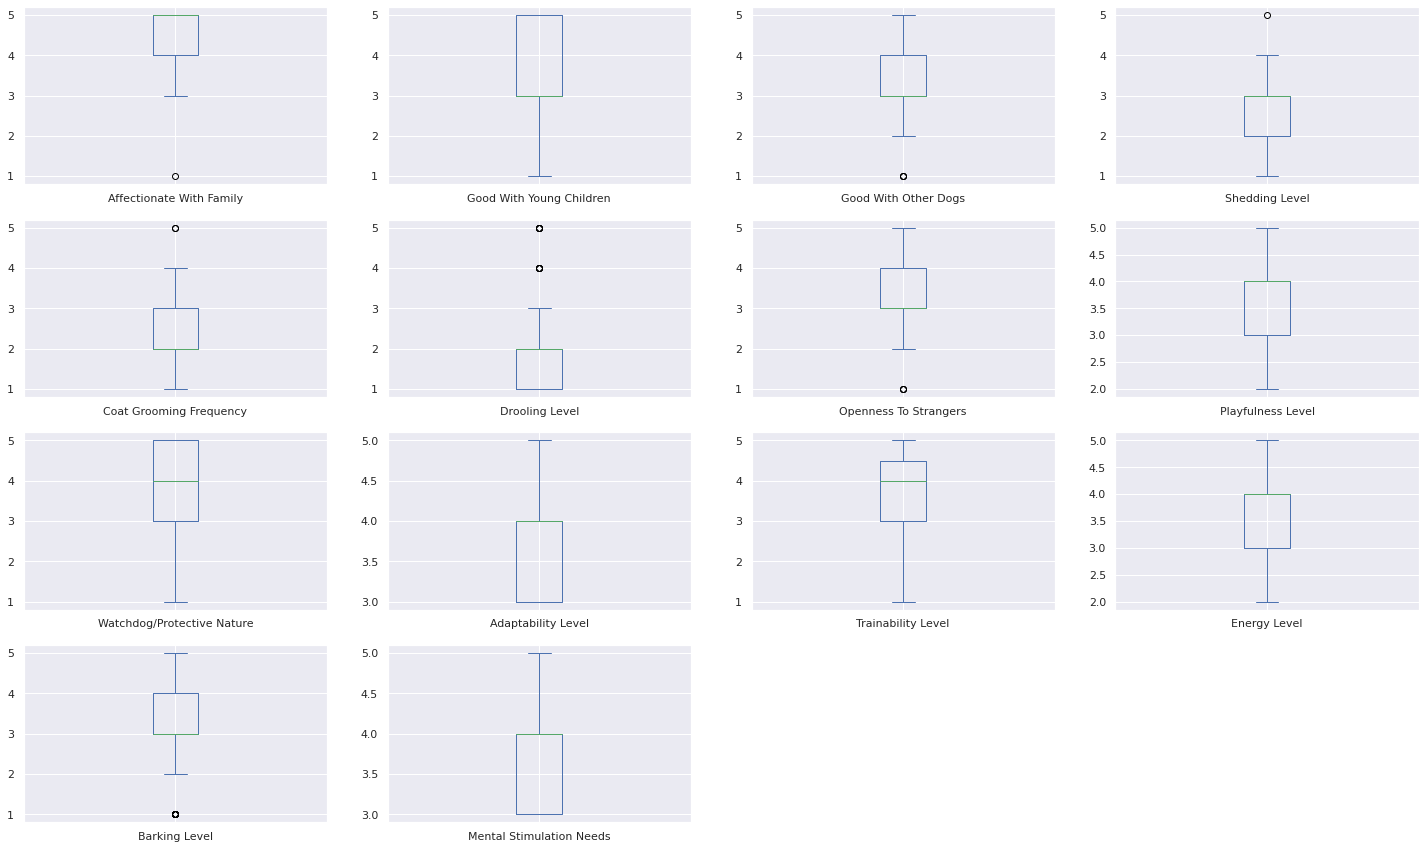

In [ ]:
#Box plot analysis
dogs_final.plot(kind='box',figsize=(25,15),subplots=True,layout=(4,4))
plt.show()

#### Low standard deviation means data are clustered around the mean, and high standard deviation indicates data are more spread out.
1. Current dataset has outliers and they are significantly small as it can be noticed that standard deviation is very miniaml across all fields and the minimum standard deviation is 0.62 ( feature - Adaptability Level ) and highest standard deviation is 1.10 ( Barking Level ). 
2. As outliers range is not highly significant, replacing outliers with Interquartile range is best way to proceed with. 

In [ ]:
dogs_final.describe()

,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,Drooling Level,Openness To Strangers,Playfulness Level,Watchdog/Protective Nature,Adaptability Level,Trainability Level,Energy Level,Barking Level,Mental Stimulation Needs
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,4.497143,3.902857,3.537143,2.657143,2.308571,1.811429,3.491429,3.651429,3.765714,3.805714,3.834286,3.731429,3.200000,3.651429
std,0.808534,1.003868,0.939273,0.807396,0.913932,0.984877,0.870121,0.701956,0.926600,0.622353,0.851619,0.751921,1.103807,0.668405
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000
25%,4.000000,3.000000,3.000000,2.000000,2.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000
75%,5.000000,5.000000,4.000000,3.000000,3.000000,2.000000,4.000000,4.000000,5.000000,4.000000,4.500000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### Outlier Treatment _ Replacing outliers with IQR.

In [ ]:
# Outlier Treatment - Quantile values replacement 


def outliers(var):
    a = []
    q1 = dogs_final[var].quantile(.25)
    q2 = dogs_final[var].quantile(.75)
    iqr = q2-q1
    ulimit = float(q2+(1.5*iqr))
    llimit = float(q1-(1.5*iqr))

    for i in dogs_final[var]:
        if i > ulimit:
            i = np.NaN
        elif i < llimit:
            i = np.NaN
        else:
            i=i
        a.append(i)
    return a

for col in dogs_final.select_dtypes(exclude='object').columns:
    dogs_final[col] = outliers(col)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
for i in dogs_final.select_dtypes(exclude='object').columns:
    dogs_final[i] = dogs_final[i].fillna(dogs_final[i].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#sns.pairplot(dogs_final)

#### After replacing with IQR values, data looks good and can be viewed/compared from the below graph.

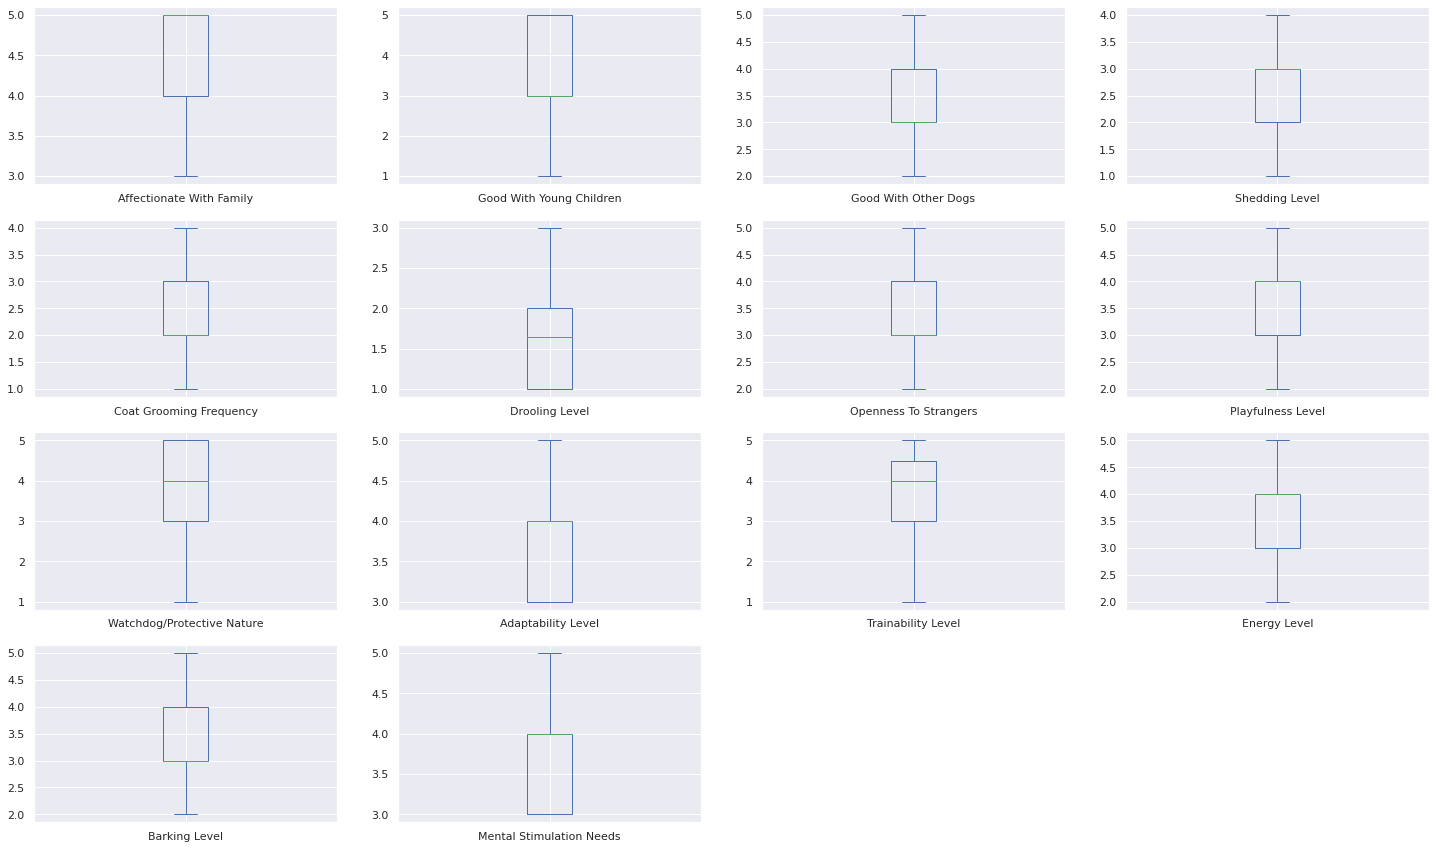

In [ ]:
#Box plot analysis
dogs_final.plot(kind='box',figsize=(25,15),subplots=True,layout=(4,4))
plt.show()

## Feature Engineering _ Data Preperation

#### Creation of new Variables based on traits description provided in the dataset.

1. **Family_life** Variable is created by combining features ***'Affectionate With Family', 'Good With Young Children', 'Good With Other Dogs'***. This category breeds with highest value are considered to be the breeds that are most welcoming dog breeds.

2. **Physical** variable is cretaed by combining features ***'Shedding Level', 'Coat Grooming Frequency', 'Drooling Level.*** This breeds category is considered be to the difficult set as high value of this category defines expensive/high maintainenace as the features contributed here confirms that. 

3. **Social** variable is created by combining features ***'Openness To Strangers','Watchdog/Protective Nature', 'Playfulness Level', 'Adaptability Level'***. This category of breeds with high value are considered to be most attentive/inteligent dogs.

4. **Personality** variable is created by combining features ***'Trainability Level', 'Barking Level', 'Energy Level', 'Mental Stimulation Needs'***. This category of breeds could be considered as very personal choice oriented and could be deal breakers while selecting a breed to adopt/purchase.

In [ ]:
### Derive volume of the diamonds with the given variables
dogs_final['Family_life'] = dogs_final['Affectionate With Family']+dogs_final['Good With Young Children']+dogs_final['Good With Other Dogs']
dogs_final['Physical'] = dogs_final['Shedding Level']+dogs_final['Coat Grooming Frequency']+dogs_final['Drooling Level']
dogs_final['Social'] = dogs_final['Openness To Strangers']+dogs_final['Watchdog/Protective Nature']+dogs_final['Playfulness Level']+dogs_final['Adaptability Level']
dogs_final['Personality'] = dogs_final['Trainability Level']+dogs_final['Barking Level']+dogs_final['Energy Level']+dogs_final['Mental Stimulation Needs']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
dogs_final.head()

,Breed,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,Drooling Level,Coat Type,Coat Length,Openness To Strangers,...,2015 Rank,2016 Rank,2017 Rank,2018 Rank,2019 Rank,2020 Rank,Family_life,Physical,Social,Personality
0,Retrievers (Labrador),5.0,5,5.0,4.0,2.0,2.0,Double,Short,5.0,...,1,1,1,1,1,1,15.0,8.0,18.0,17.000000
1,French Bulldogs,5.0,5,4.0,3.0,1.0,3.0,Smooth,Short,5.0,...,6,6,4,4,4,2,14.0,7.0,18.0,13.467949
2,German Shepherd Dogs,5.0,5,3.0,4.0,2.0,2.0,Double,Medium,3.0,...,2,2,2,2,2,3,13.0,8.0,17.0,18.000000
3,Retrievers (Golden),5.0,5,5.0,4.0,2.0,2.0,Double,Medium,5.0,...,3,3,3,3,3,4,15.0,8.0,17.0,15.467949
4,Bulldogs,4.0,3,3.0,3.0,3.0,3.0,Smooth,Short,4.0,...,4,4,5,5,5,5,10.0,9.0,14.0,12.000000


In [ ]:
dogs_final.drop(['Affectionate With Family', 'Good With Young Children', 'Good With Other Dogs','Shedding Level','Coat Grooming Frequency','Drooling Level','Openness To Strangers',
'Watchdog/Protective Nature','Playfulness Level','Adaptability Level','Trainability Level','Barking Level','Energy Level','Mental Stimulation Needs','2013 Rank','2014 Rank','2015 Rank','2016 Rank','2017 Rank'], axis=1, inplace=True)
dogs_final.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Breed,Coat Type,Coat Length,2018 Rank,2019 Rank,2020 Rank,Family_life,Physical,Social,Personality
0,Retrievers (Labrador),Double,Short,1,1,1,15.0,8.0,18.0,17.000000
1,French Bulldogs,Smooth,Short,4,4,2,14.0,7.0,18.0,13.467949
2,German Shepherd Dogs,Double,Medium,2,2,3,13.0,8.0,17.0,18.000000
3,Retrievers (Golden),Double,Medium,3,3,4,15.0,8.0,17.0,15.467949
4,Bulldogs,Smooth,Short,5,5,5,10.0,9.0,14.0,12.000000


## What are the Top 10 dog breeds while priortizing newly built feature/trait 'Family_life' ?

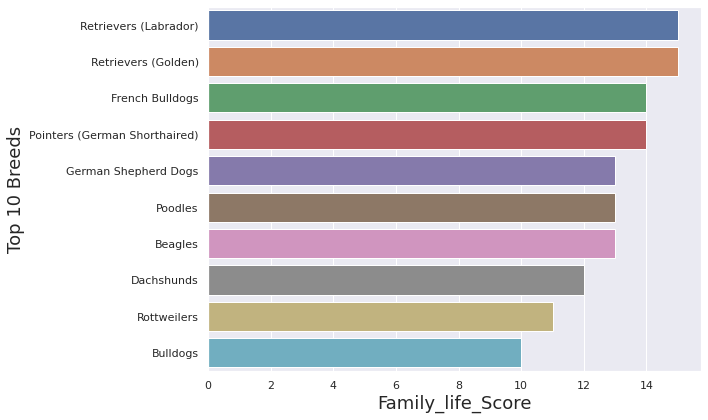

In [ ]:
plt.figure(figsize=(10,6))
# make barplot
sns.barplot(x='Family_life', y="Breed", data=dogs_final, order=dogs_final.head(10).sort_values('Family_life',ascending = False).Breed)
# set labels
plt.xlabel("Family_life_Score", size=18)
plt.ylabel("Top 10 Breeds", size=18)
#plt.title("Bar plot with Seaborn", size=18)
plt.tight_layout()
#plt.savefig("barplot_Seaborn_Python.png", dpi=5)

#### **Retrievers (Labrador) and Retrievers (Golden)** tops the chart with value **15** and considerable to be the most favourite choice if traits like affectionate, kids friendly, friendly with other dogs are primary choice by consumers.

## What are the Top 10 dog breeds while priortizing newly built feature/trait 'Physical' ?

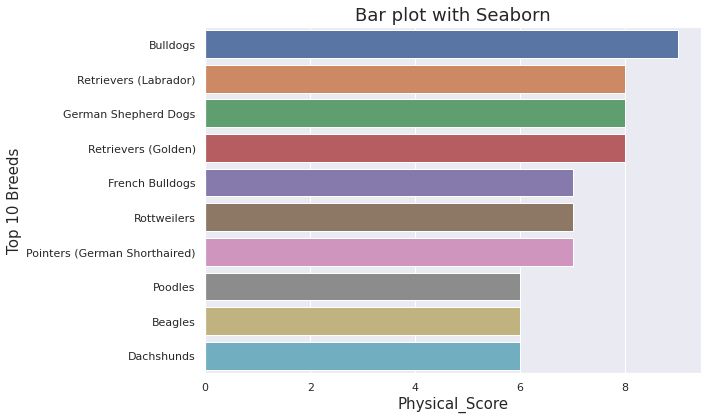

In [ ]:
plt.figure(figsize=(10,6))
# make barplot
sns.barplot(x='Physical', y="Breed", data=dogs_final, order=dogs_final.head(10).sort_values('Physical',ascending = False).Breed)
# set labels
plt.xlabel("Physical_Score", size=15)
plt.ylabel("Top 10 Breeds", size=15)
plt.title("Bar plot with Seaborn", size=18)
plt.tight_layout()
plt.savefig("barplot_Seaborn_Python.png", dpi=10)

#### **Bulldogs** breed is the high maintainence breed with highest value **9** and is most probably not pocket friendly for all the consumers.

## What are the Top 10 dog breeds while priortizing newly built feature/trait 'Social' ?

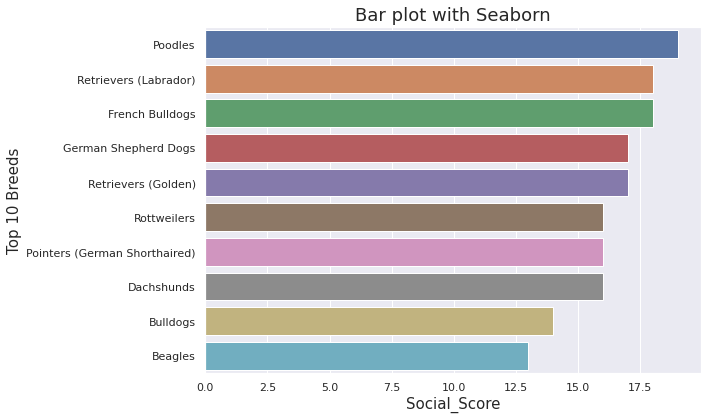

In [ ]:
plt.figure(figsize=(10,6))
# make barplot
sns.barplot(x='Social', y="Breed", data=dogs_final, order=dogs_final.head(10).sort_values('Social',ascending = False).Breed)
# set labels
plt.xlabel("Social_Score", size=15)
plt.ylabel("Top 10 Breeds", size=15)
plt.title("Bar plot with Seaborn", size=18)
plt.tight_layout()
plt.savefig("barplot_Seaborn_Python.png", dpi=10)

####  **Poodles, Retrievers (Labrador), French Bulldogs** are the top 3 breeds with highest value of **18, 17** and consider to be most desirable and traits like  'Openness To Strangers','Watchdog/Protective Nature', 'Playfulness Level', 'Adaptability Level' are everyone's favourite. These breeds are considered to be smart and intelligent.

## What are the Top 10 dog breeds while priortizing newly built feature/trait 'Personality' ?

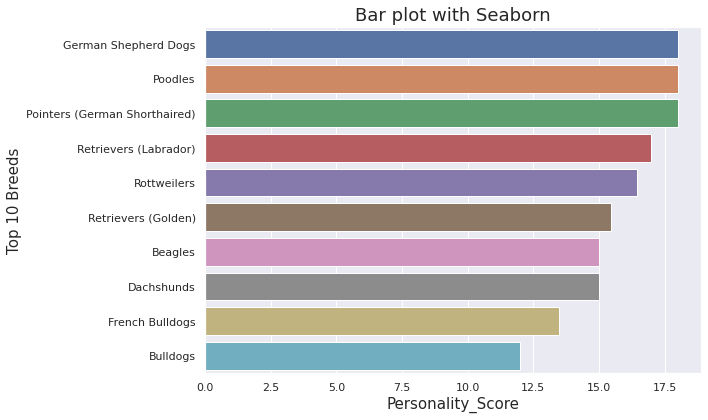

In [ ]:
plt.figure(figsize=(10,6))
# make barplot
sns.barplot(x='Personality', y="Breed", data=dogs_final, order=dogs_final.head(10).sort_values('Personality',ascending = False).Breed)
# set labels
plt.xlabel("Personality_Score", size=15)
plt.ylabel("Top 10 Breeds", size=15)
plt.title("Bar plot with Seaborn", size=18)
plt.tight_layout()
plt.savefig("barplot_Seaborn_Python.png", dpi=10)

#### **German Shepherd Dogs, Poodles, Pointers (German Shorthaired)**breeds are the top 3 breeds with highest value **18** and considered to be individual choice oriented breeds as this could be highly variable breed category.

## Summary

According to 2020 Ranking, below are top 10 Category breeds.
1. Retrievers (Labrador)
2. French Bulldogs
3. German Shepherd Dogs
4. Retrievers (Golden)
5. Bulldogs
6. Poodles
7. Beagles
8. Rottweilers
9. Pointers (German Shorthaired)
10. Dachshunds

Acoording to each independent category, below breeds would top the chart.

1. **Retrievers (Labrador) and Retrievers (Golden)** - Family_life
2. **Bulldogs** - Physical
3. **Poodles, Retrievers (Labrador), French Bulldogs** - Social
4. **German Shepherd Dogs, Poodles, Pointers (German Shorthaired)**- Personality


